In [38]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import scipy.stats as stats
from termcolor import colored
from statannot import add_stat_annotation


In [39]:
#import dataframe
path = 'normalized.pickle'
df = pd.read_pickle(os.path.join(r'C:\Users\Teresa\Desktop\TESE\Textural Analysis', path))

In [40]:
#separate df according to phase
G1 = df.loc[df['Automatic Label'] == 0]
S_G2 = df.loc[df['Automatic Label'] == 1]

#Check number of nuclei in each phase
print(G1.shape)
print(S_G2.shape)

(2291, 50)
(1262, 50)


In [41]:
#data included in dataframe
list(df.columns) 

['Area',
 'Image',
 'Mean Green',
 'Mean Intensity',
 'Mean Red',
 'Normalized Mean Green',
 'Normalized Mean Red',
 'Normalized Total Green',
 'Normalized Total Red',
 'Nucleus Patch',
 'Total Green',
 'Total Intensity',
 'Total Red',
 'norm_area',
 'norm_intensity',
 'Automatic Label',
 'Mean',
 'Std',
 'Variance',
 'Skewness',
 'Kurtosis',
 'Uniformity',
 'Invariant Uniformity',
 'GLCM Entropy',
 'GLCM Invariant Entropy',
 'Correlation',
 'Invariant Correlation',
 'Dissimilarity',
 'Invariant Dissimilarity',
 'Contrast',
 'Invariant Contrast',
 'Homogeneity',
 'Invariant Homogeneity',
 'Energy',
 'Invariant Energy',
 'BB Area',
 'Centroid',
 'Weighted Centroid',
 'Centroid Divergence',
 'Eccentricity',
 'Equivalent Diameter',
 'Major Axis Length',
 'Minor Axis Length',
 'Max Intensity',
 'Min Intensity',
 'Orientation',
 'Perimeter',
 'Solidity',
 'Entropy',
 'Circularity']

In [42]:
#utest

def plt_hist_and_stats_utest(columns, types, histogram = True):
    for column in columns:
        #create a new figure
        plt.figure()
        plt.rcParams['figure.figsize'] = (10,10)
        for subtype in types:
            
            tp = eval(subtype)
            #subset to the type

            #compute some statistics
            aux = tp[column].describe()

            #Draw the density plot
            plt.rcParams['figure.figsize'] = (10,10)
            sns.distplot(tp[column], hist = histogram, kde = True,
                        label = subtype+r'(Mean = %0.2f, STD %0.2f, Max = %0.2f, Min = %0.2f)' % (aux['mean'], aux['std'], aux['max'], aux['min']))
            plt.legend(prop = {'size': 10}, title = 'Stage')
            plt.title(column)
            plt.xlabel(column)
            plt.ylabel('Density')
            
            
        subset1  = eval(types[0])
        subset2 = eval(types[1])
        u_statistic, pVal = stats.mannwhitneyu(subset1[column], subset2[column], alternative = 'two-sided')
        print('THE P-VALUE IS:')
        print(pVal)
        if pVal < 0.05:
            aux = '\033[1m' + ' is ' + '\033[0m'
            aux = colored(aux, 'blue') 
            hipothesis =  'H1: The difference' + aux + 'statistically significant (at significance level: 0.05).'
        else:
            aux = '\033[1m' + ' is not ' + '\033[0m'
            aux = colored(aux, 'blue')
            hipothesis ='H0: The difference' + aux + 'statistically significant (at significance level: 0.05).'
        print('For feature ' + column + ' - ' + hipothesis)
        #print(u_statistic)

THE P-VALUE IS:
3.616021368134499e-189
For feature Entropy - H1: The difference is statistically significant (at significance level: 0.05).
THE P-VALUE IS:
2.6768406762283908e-42
For feature Circularity - H1: The difference is statistically significant (at significance level: 0.05).
THE P-VALUE IS:
3.205597269953735e-61
For feature Solidity - H1: The difference is statistically significant (at significance level: 0.05).
THE P-VALUE IS:
1.6783604860866635e-39
For feature Eccentricity - H1: The difference is statistically significant (at significance level: 0.05).
THE P-VALUE IS:
8.065038876911337e-147
For feature Perimeter - H1: The difference is statistically significant (at significance level: 0.05).
THE P-VALUE IS:
6.087580336900195e-181
For feature Area - H1: The difference is statistically significant (at significance level: 0.05).
THE P-VALUE IS:
4.8301901786625234e-107
For feature Mean Intensity - H1: The difference is statistically significant (at significance level: 0.05).
THE 

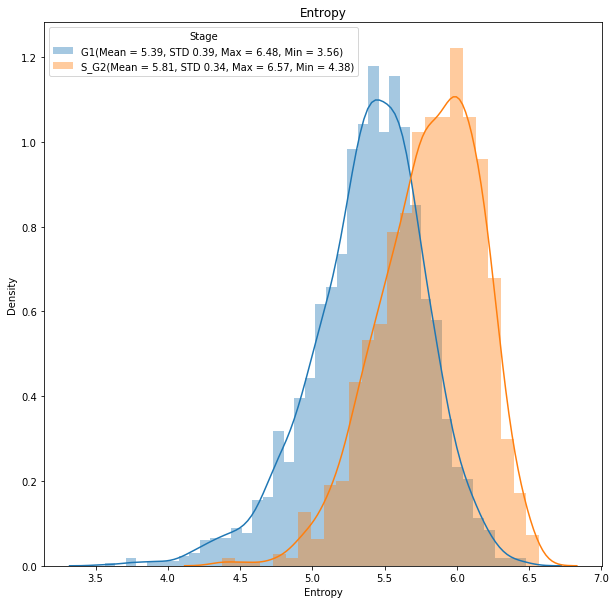

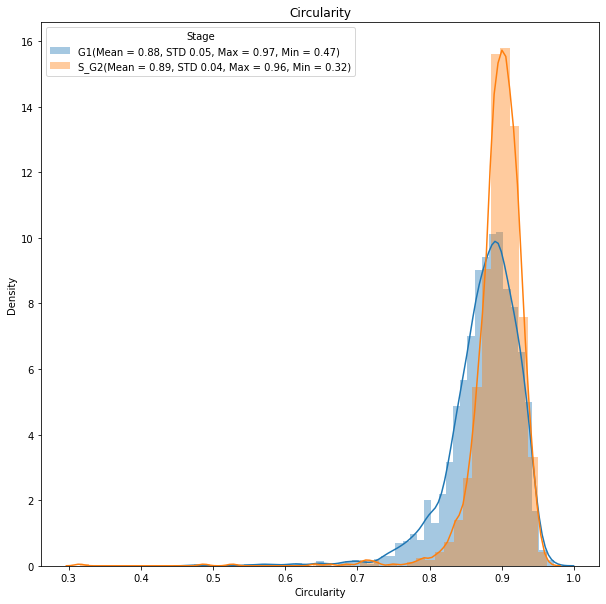

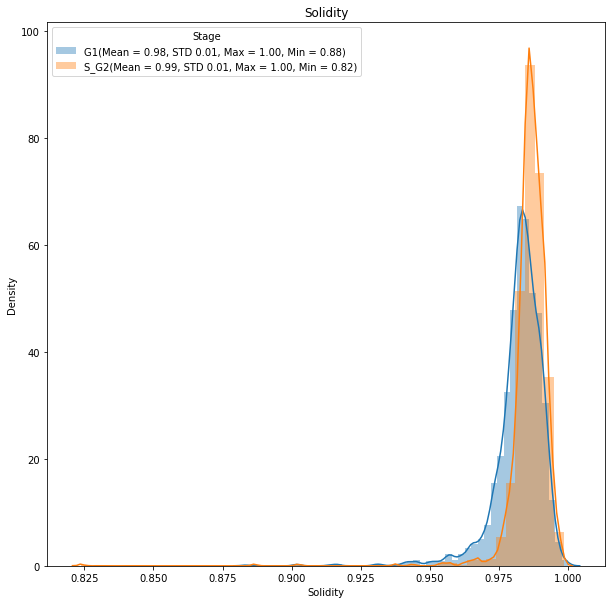

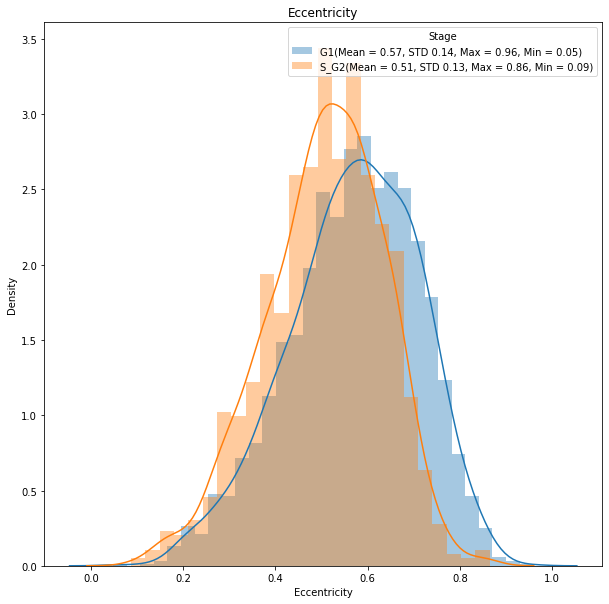

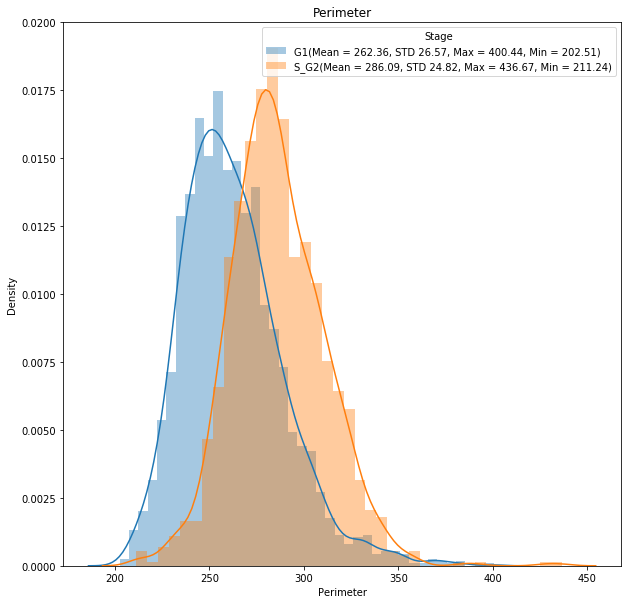

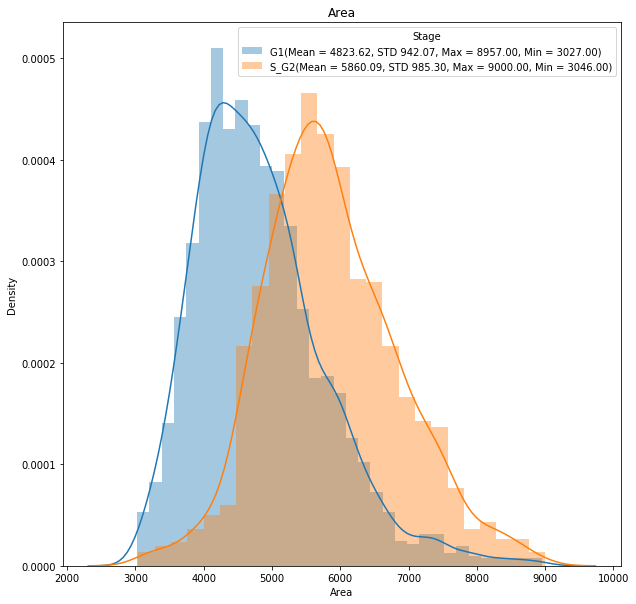

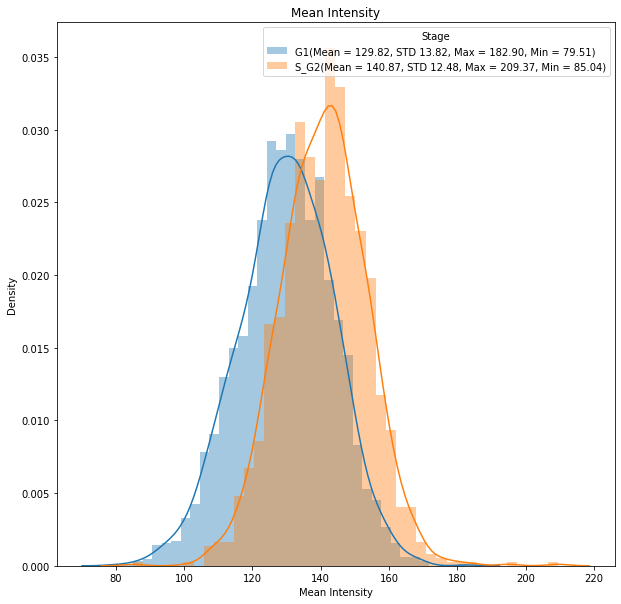

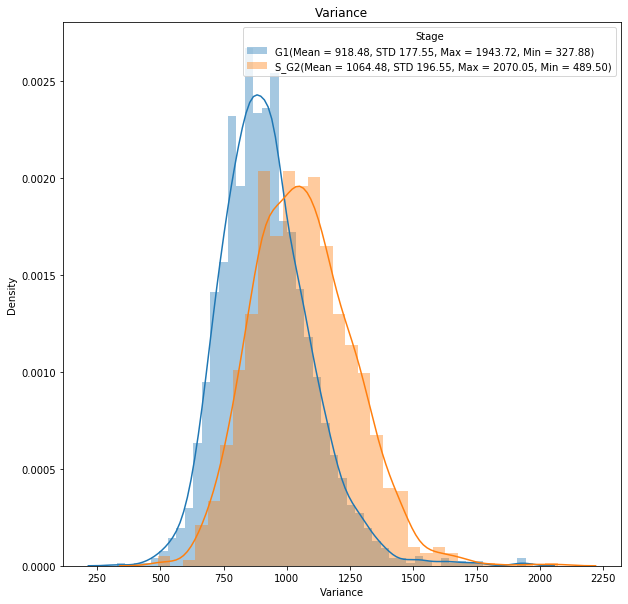

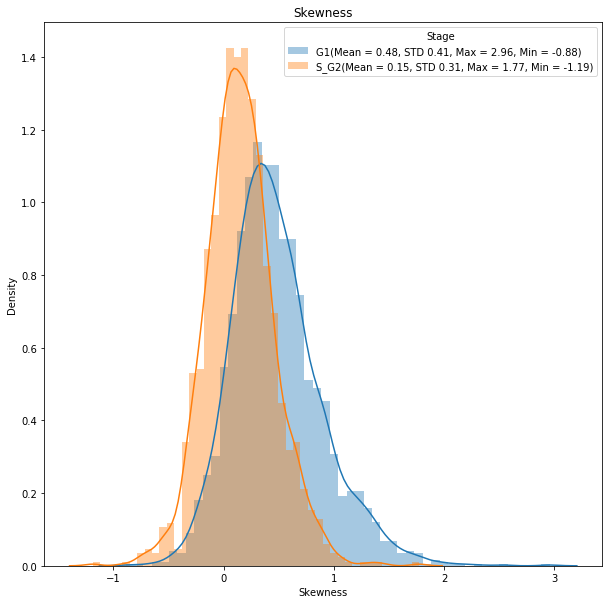

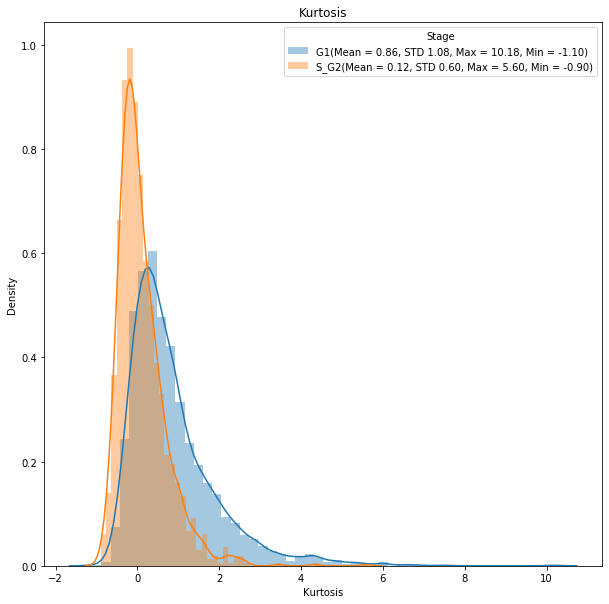

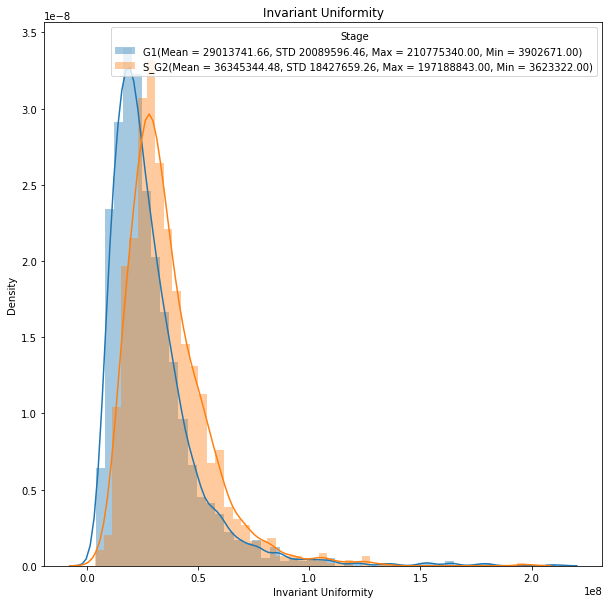

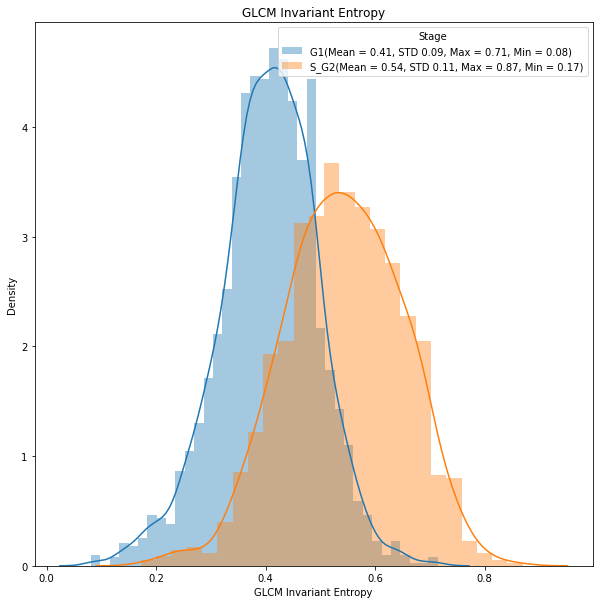

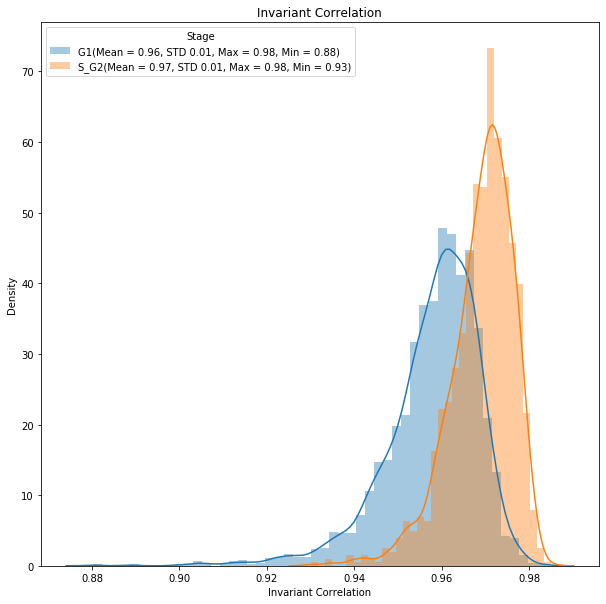

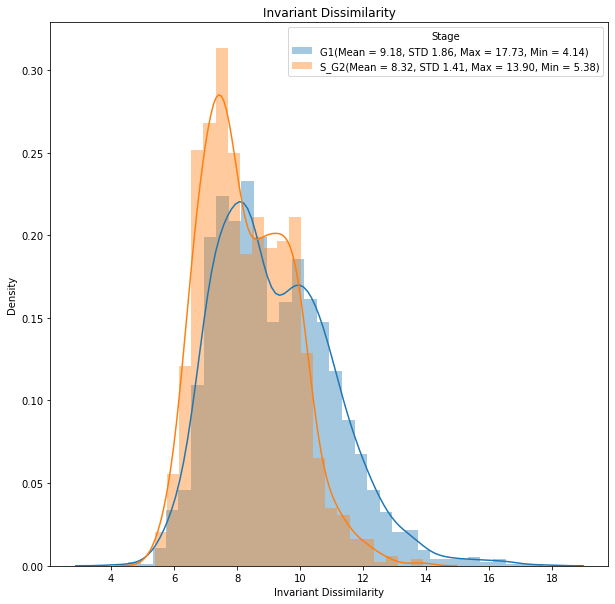

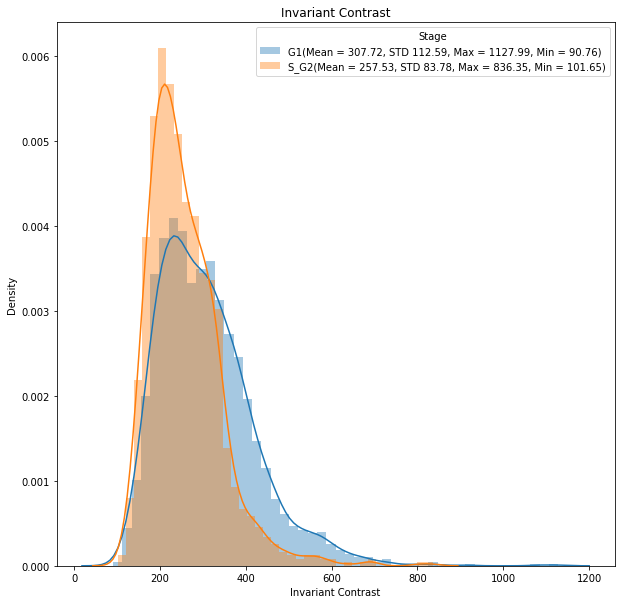

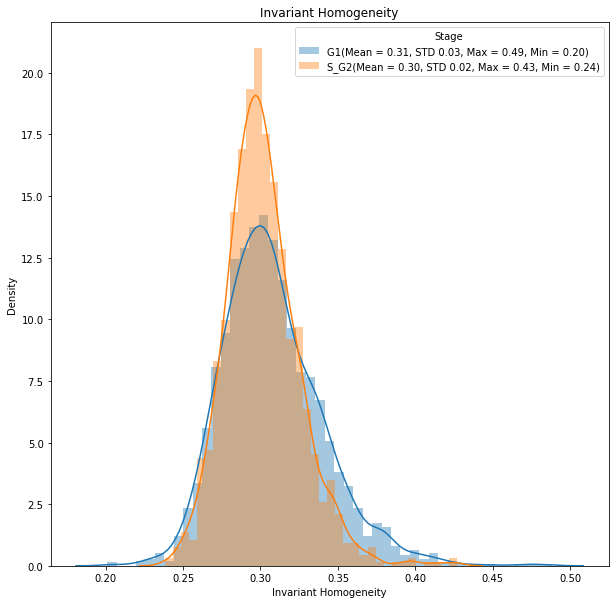

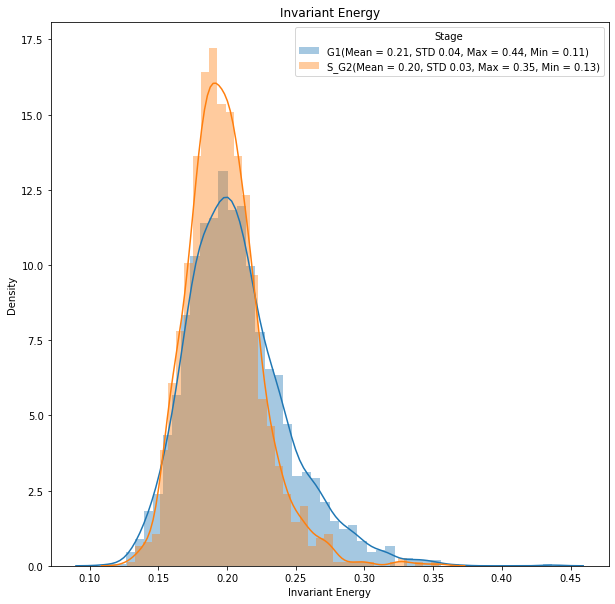

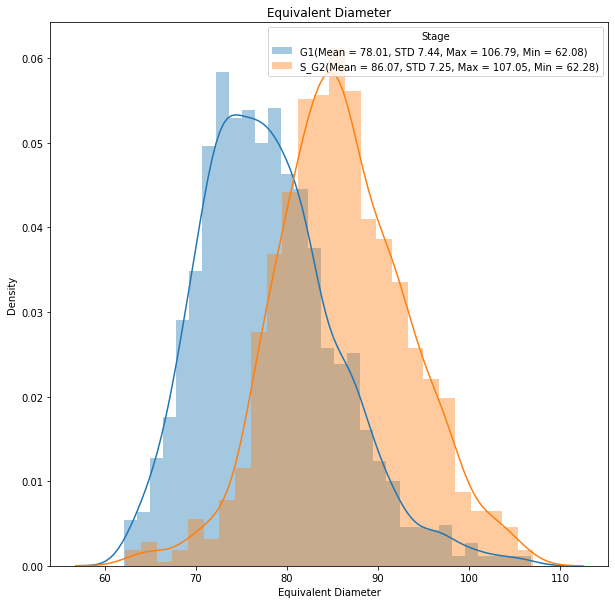

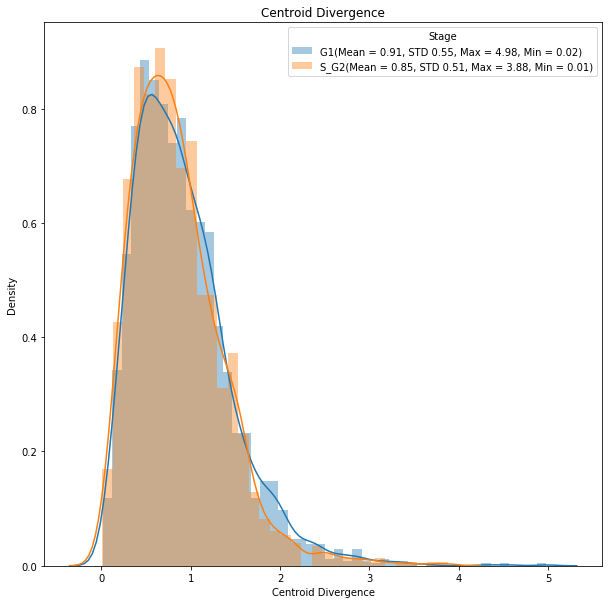

In [43]:
#utest

types = ['G1','S_G2']
columns = ['Entropy',
            'Circularity',
            'Solidity',
            'Eccentricity',
            'Perimeter',
            'Area',
            'Mean Intensity',
            'Variance',
            'Skewness',
            'Kurtosis',
            'Invariant Uniformity',
            'GLCM Invariant Entropy',
            'Invariant Correlation',
            'Invariant Dissimilarity',
            'Invariant Contrast',
            'Invariant Homogeneity',
            'Invariant Energy',
            'Equivalent Diameter',
            'Centroid Divergence']

plt_hist_and_stats_utest(columns, types, True)

In [44]:
#auxiliary function

def stats_pval_table(column, types):
    import scipy.stats as stats
    subset1  = eval(types[0])
    subset2 = eval(types[1])
    u_statistic, pVal = stats.mannwhitneyu(subset1[column], subset2[column], alternative = 'two-sided')
    return pVal


In [45]:
#get a table with p-values

types = ['G1','S_G2']    

columns = ['Entropy',
            'Circularity',
            'Solidity',
            'Eccentricity',
            'Perimeter',
            'Area',
            'Mean Intensity',
            'Variance',
            'Skewness',
            'Kurtosis',
            'Invariant Uniformity',
            'GLCM Invariant Entropy',
            'Invariant Correlation',
            'Invariant Dissimilarity',
            'Invariant Contrast',
            'Invariant Homogeneity',
            'Invariant Energy',
            'Equivalent Diameter',
            'Centroid Divergence']

pval_table = pd.DataFrame(columns =[
            'Entropy',
            'Circularity',
            'Solidity',
            'Eccentricity',
            'Perimeter',
            'Area',
            'Mean Intensity',
            'Variance',
            'Skewness',
            'Kurtosis',
            'Invariant Uniformity',
            'GLCM Invariant Entropy',
            'Invariant Correlation',
            'Invariant Dissimilarity',
            'Invariant Contrast',
            'Invariant Homogeneity',
            'Invariant Energy',
            'Equivalent Diameter',
            'Centroid Divergence'])

pval_list = []
for column in columns:
    pval = stats_pval_table(column, types)
    pval_list.append(pval)
comparison = types[0] + ' vs ' + types[1]

i=0
res = {}
for label in columns:
    res[label] = pval_list[i]
    i = i+1


row = len(pval_table)
pval_table.loc[row] = res


In [46]:
#visualize
pval_table

,Entropy,Circularity,Solidity,Eccentricity,Perimeter,Area,Mean Intensity,Variance,Skewness,Kurtosis,Invariant Uniformity,GLCM Invariant Entropy,Invariant Correlation,Invariant Dissimilarity,Invariant Contrast,Invariant Homogeneity,Invariant Energy,Equivalent Diameter,Centroid Divergence
0,3.616021e-189,2.676841e-42,3.205597e-61,1.678360e-39,8.065039e-147,6.087580e-181,4.830190e-107,7.206003e-103,7.624210e-127,6.816372e-141,2.442763e-54,7.830669e-244,3.661147e-231,3.438335e-41,9.488027e-44,0.000002,3.172183e-12,6.087580e-181,0.005068


In [47]:
#test for different p-values
pval_table < 0.05

,Entropy,Circularity,Solidity,Eccentricity,Perimeter,Area,Mean Intensity,Variance,Skewness,Kurtosis,Invariant Uniformity,GLCM Invariant Entropy,Invariant Correlation,Invariant Dissimilarity,Invariant Contrast,Invariant Homogeneity,Invariant Energy,Equivalent Diameter,Centroid Divergence
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [48]:
pval_table < 0.01

,Entropy,Circularity,Solidity,Eccentricity,Perimeter,Area,Mean Intensity,Variance,Skewness,Kurtosis,Invariant Uniformity,GLCM Invariant Entropy,Invariant Correlation,Invariant Dissimilarity,Invariant Contrast,Invariant Homogeneity,Invariant Energy,Equivalent Diameter,Centroid Divergence
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [49]:
pval_table < 0.001

,Entropy,Circularity,Solidity,Eccentricity,Perimeter,Area,Mean Intensity,Variance,Skewness,Kurtosis,Invariant Uniformity,GLCM Invariant Entropy,Invariant Correlation,Invariant Dissimilarity,Invariant Contrast,Invariant Homogeneity,Invariant Energy,Equivalent Diameter,Centroid Divergence
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False


In [50]:
pval_table < 0.0001

,Entropy,Circularity,Solidity,Eccentricity,Perimeter,Area,Mean Intensity,Variance,Skewness,Kurtosis,Invariant Uniformity,GLCM Invariant Entropy,Invariant Correlation,Invariant Dissimilarity,Invariant Contrast,Invariant Homogeneity,Invariant Energy,Equivalent Diameter,Centroid Divergence
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False


In [51]:
#another auxiliary function

def obtain_columns(columns, typee):
        import scipy.stats as stats
        subset  = eval(typee)
        subset1 = subset[columns]
        return subset1

No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.616e-189 U_stat=5.872e+05


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.677e-42 U_stat=1.047e+06


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.206e-61 U_stat=9.626e+05


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.678e-39 U_stat=1.830e+06
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.065e-147 U_stat=6.905e+05


No handles with labels found to put in legend.
No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.088e-181 U_stat=6.063e+05


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.830e-107 U_stat=8.025e+05


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.206e-103 U_stat=8.154e+05


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.624e-127 U_stat=2.147e+06


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.816e-141 U_stat=2.185e+06
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.443e-54 U_stat=9.914e+05


No handles with labels found to put in legend.
No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.831e-244 U_stat=4.698e+05


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.661e-231 U_stat=4.957e+05


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.438e-41 U_stat=1.839e+06


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.488e-44 U_stat=1.852e+06


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.855e-06 U_stat=1.585e+06


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.172e-12 U_stat=1.650e+06


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.088e-181 U_stat=6.063e+05


No handles with labels found to put in legend.


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

G1 v.s. S_G2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.068e-03 U_stat=1.528e+06


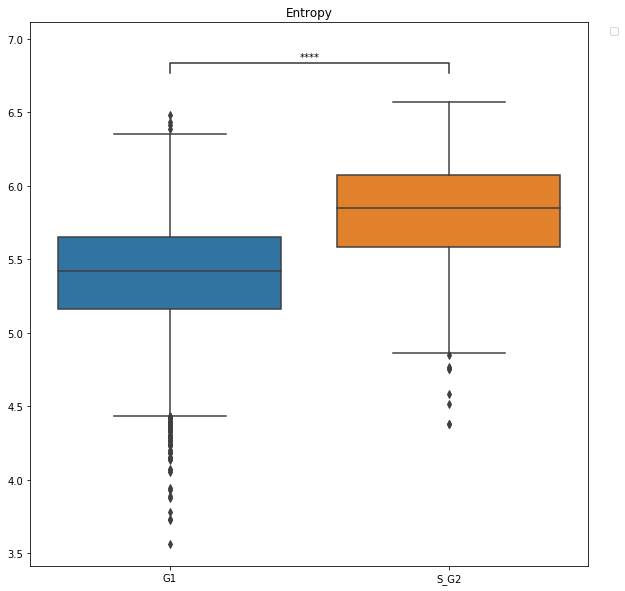

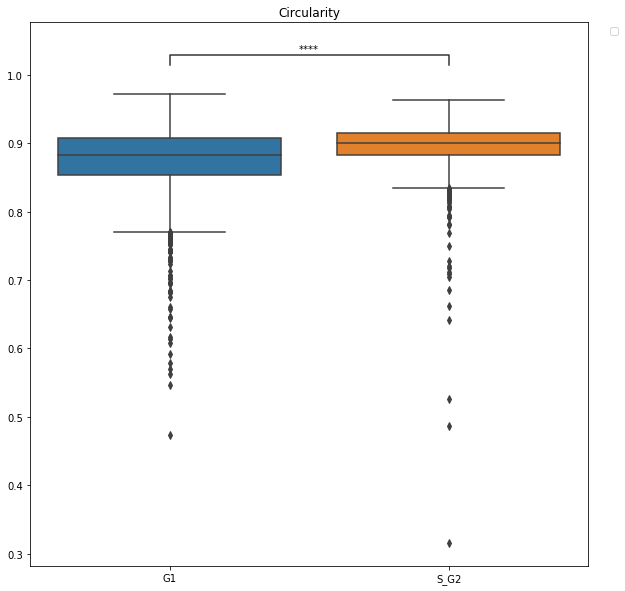

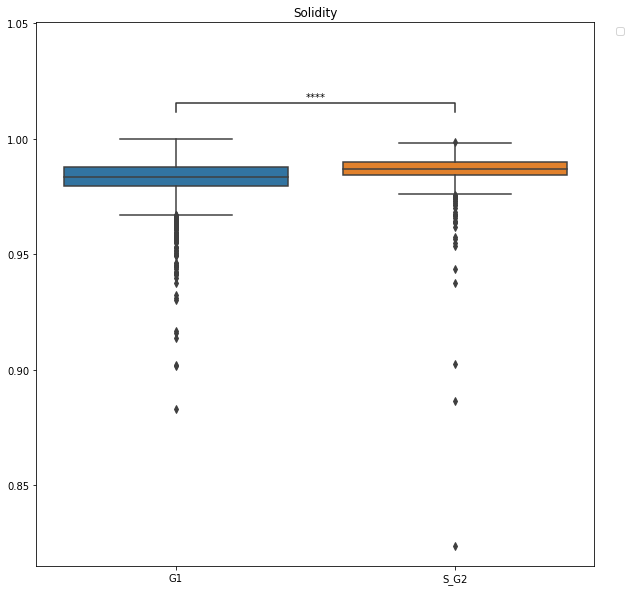

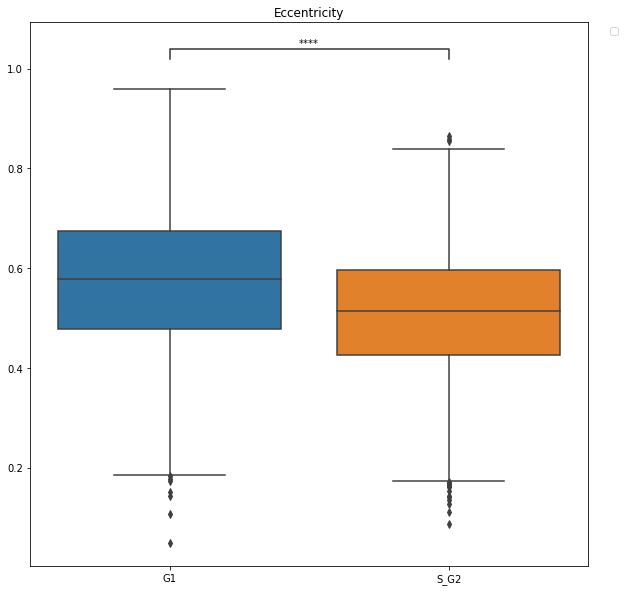

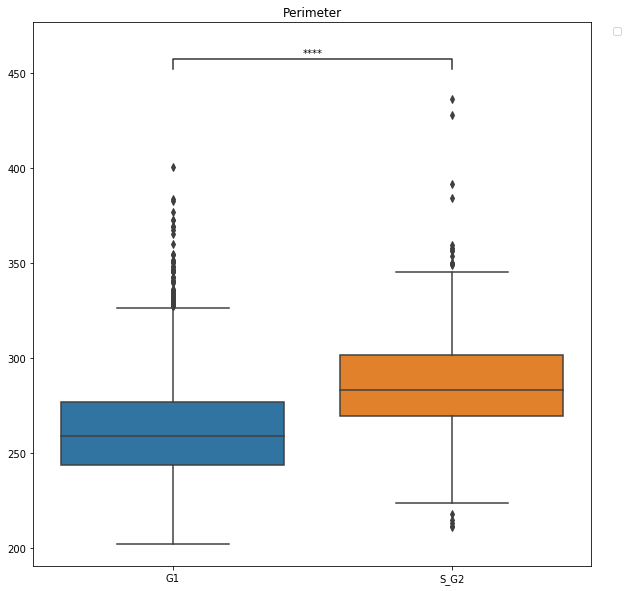

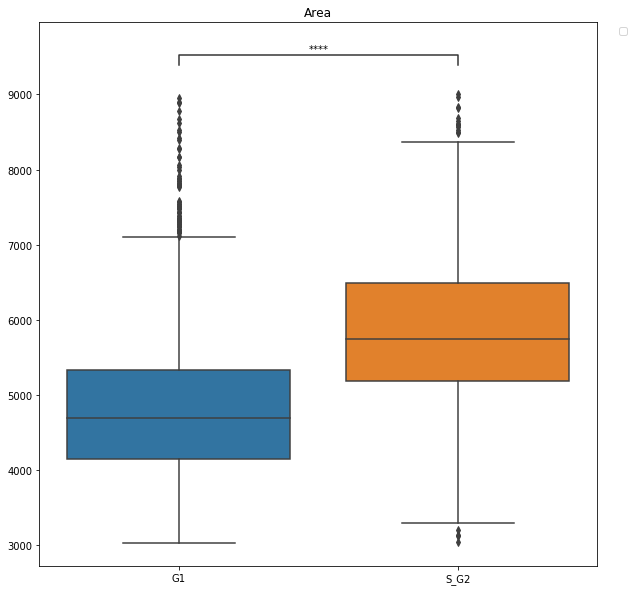

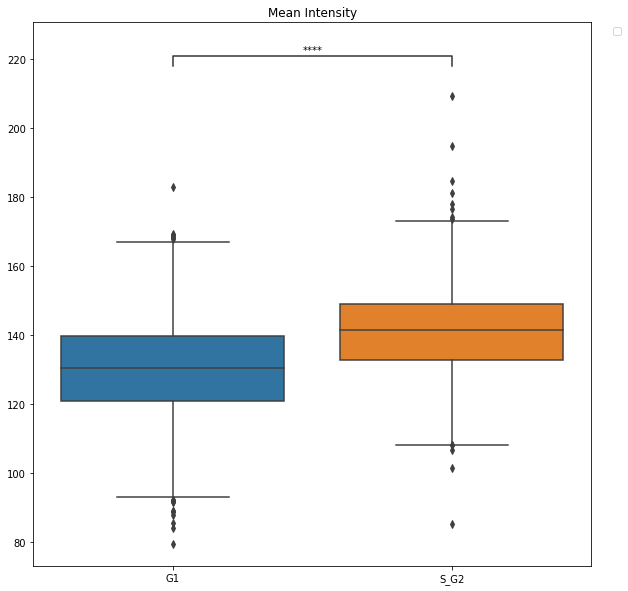

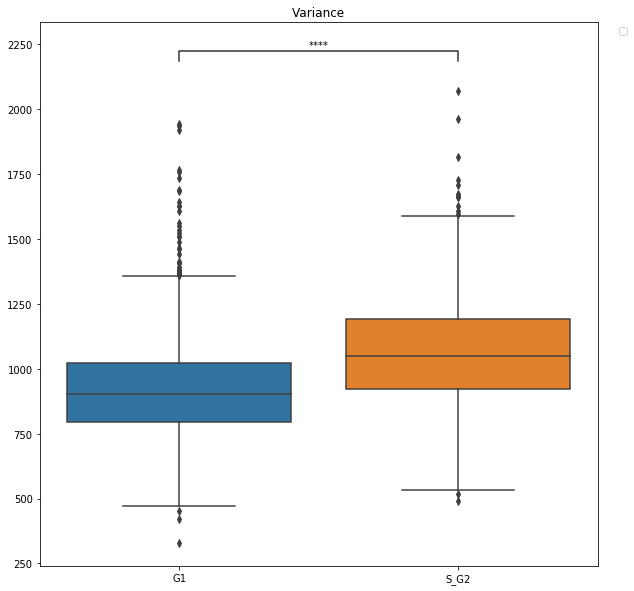

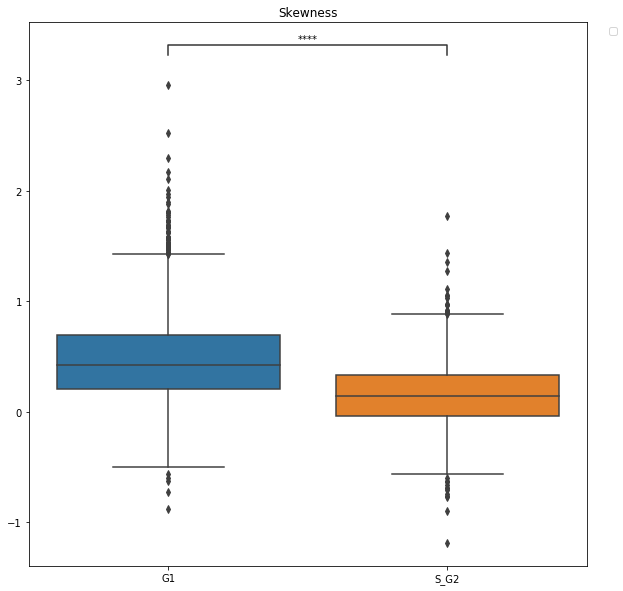

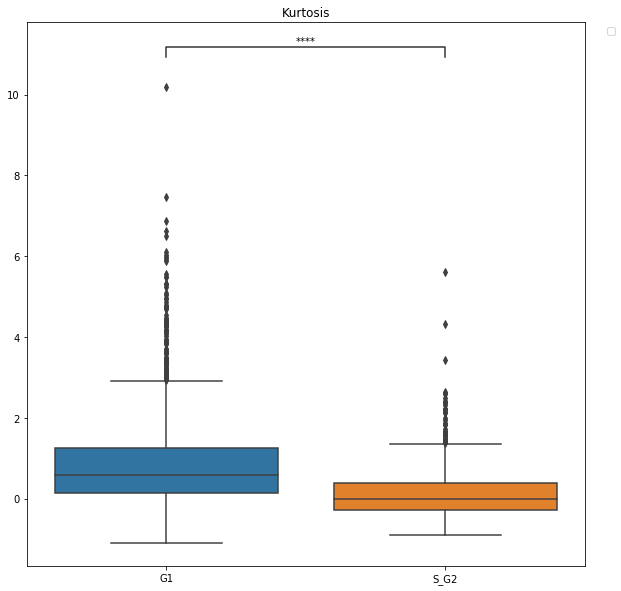

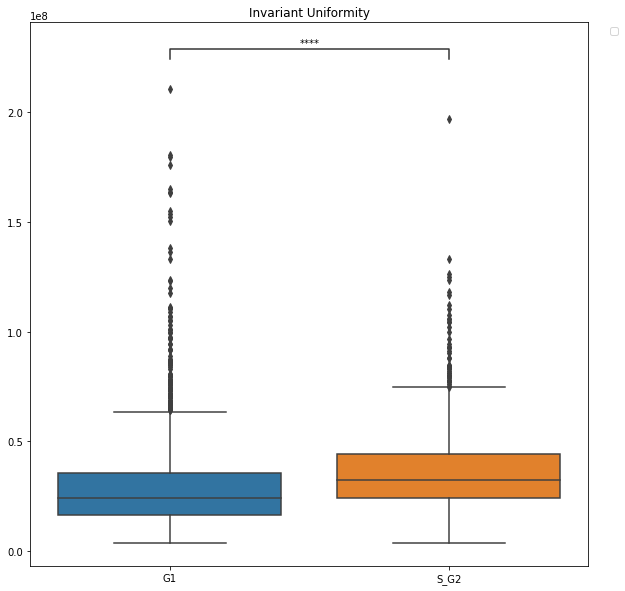

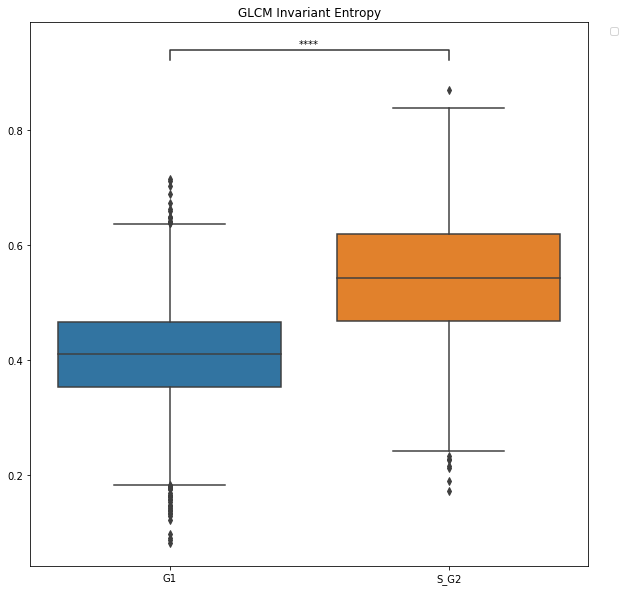

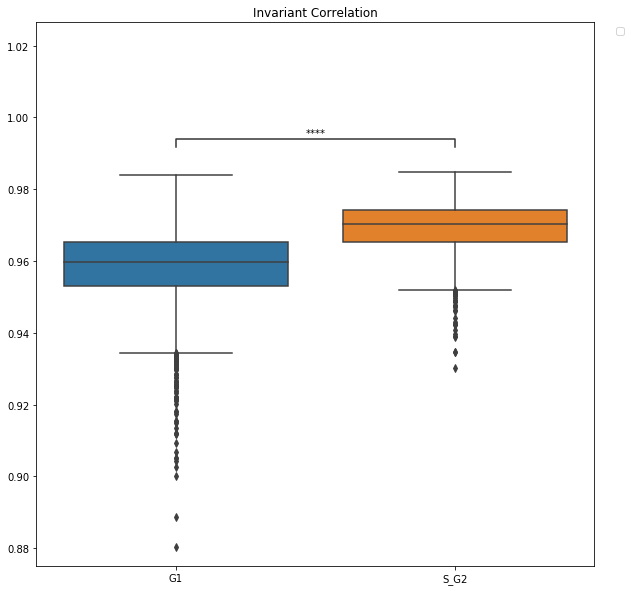

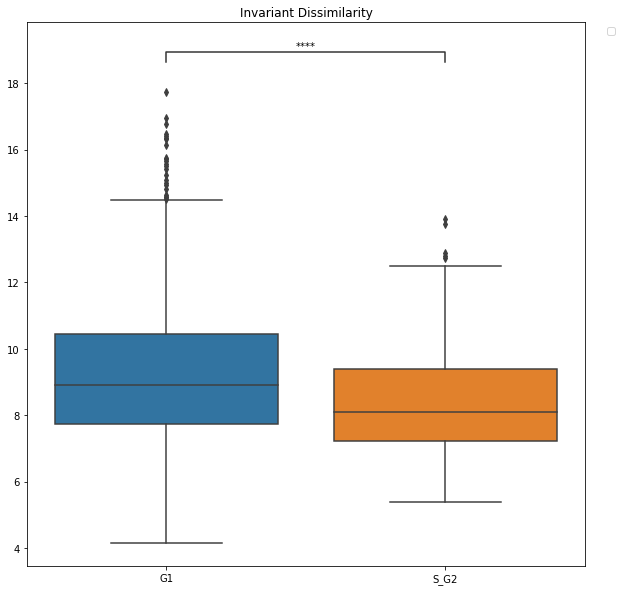

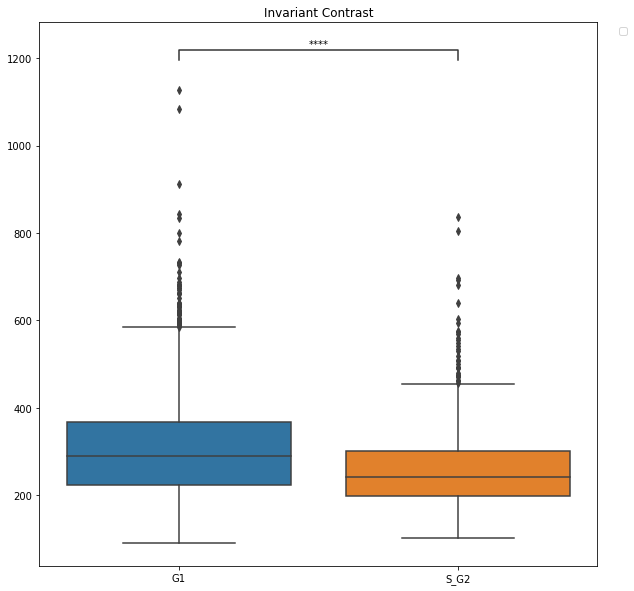

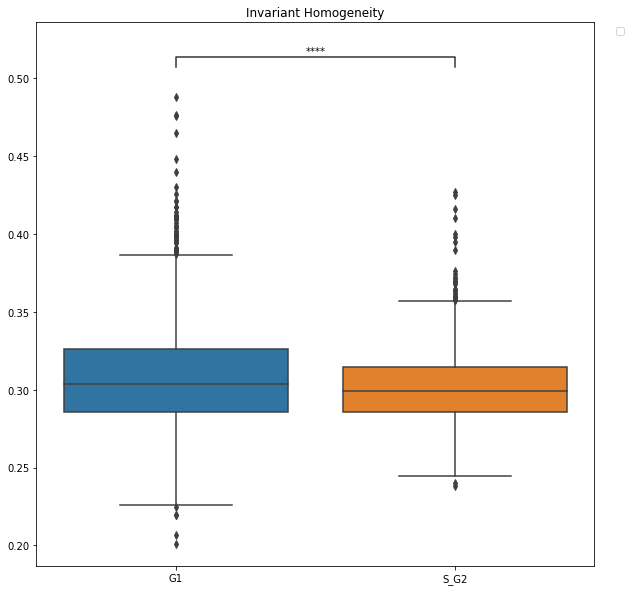

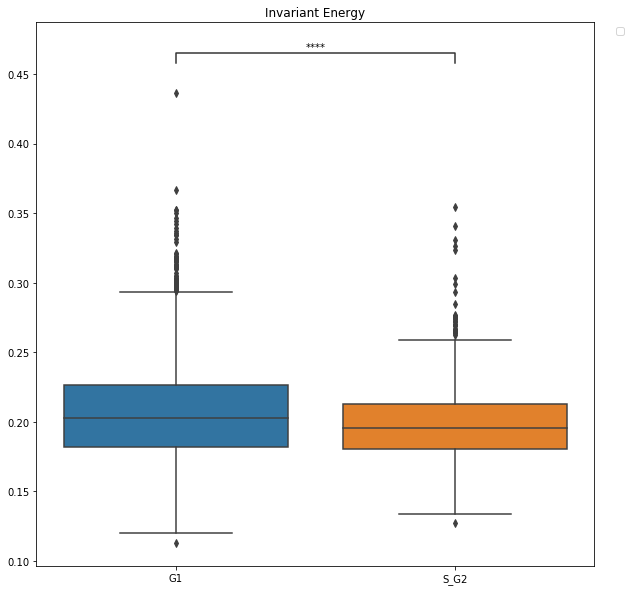

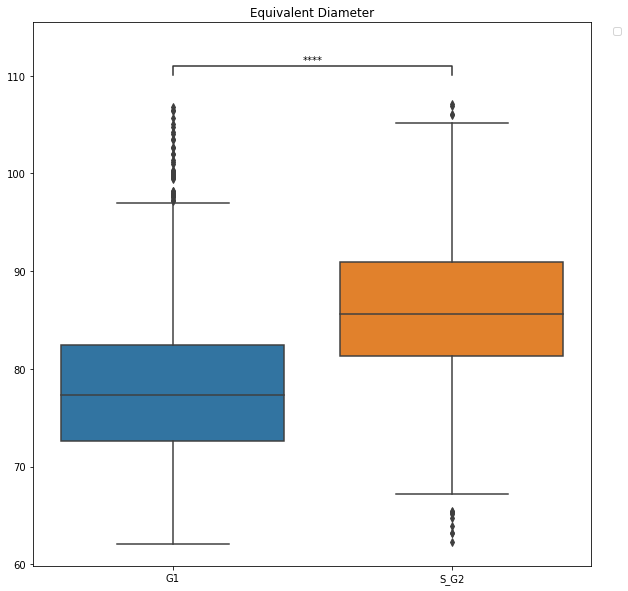

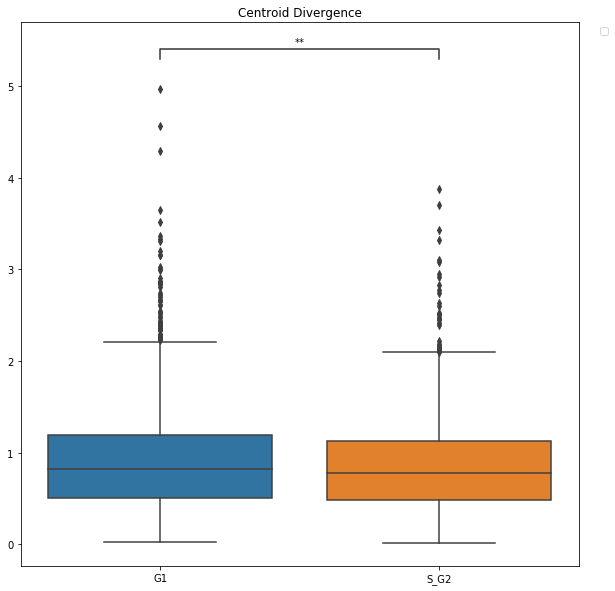

In [52]:
#obtain whisker plots

types = ['G1','S_G2']
columns = ['Entropy',
            'Circularity',
            'Solidity',
            'Eccentricity',
            'Perimeter',
            'Area',
            'Mean Intensity',
            'Variance',
            'Skewness',
            'Kurtosis',
            'Invariant Uniformity',
            'GLCM Invariant Entropy',
            'Invariant Correlation',
            'Invariant Dissimilarity',
            'Invariant Contrast',
            'Invariant Homogeneity',
            'Invariant Energy',
            'Equivalent Diameter',
            'Centroid Divergence']


for column in columns:
    plt.figure()
    filename = []
    table = pd.DataFrame(columns = [])
    for tp in types:
        columnn = obtain_columns(column, tp)
        
       
        a = []
        
        for i in np.arange(len(columnn.to_numpy())):
            a.append(columnn.to_numpy()[i])
        
        
        
        table_aux = pd.DataFrame({tp: a})
        table = pd.concat([table,table_aux], axis=1)
        
    
    ax = sns.boxplot(data=table)
    add_stat_annotation(ax, data=table,
    box_pairs=[(types[0], types[1])],
                test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
    plt.rcParams['figure.figsize'] = (10,10)
    plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
    plt.title(column)

In [54]:
#t-test for same data

def plt_hist_and_stats_ttest(columns, types, histogram = True, equal_var = True):
    for column in columns:
        #create a new figure
        plt.figure()
        for subtype in types:
            
            tp = eval(subtype)
            #subset to the type

            #compute some statistics
            aux = tp[column].describe()

            #Draw the density plot
            sns.distplot(tp[column], hist = histogram, kde = False,
                        label = subtype+r'(Mean = %0.2f, STD %0.2f, Max = %0.2f, Min = %0.2f)' % (aux['mean'], aux['std'], aux['max'], aux['min']))
            plt.legend(prop = {'size': 10}, title = 'Stage')
            plt.title(column)
            plt.xlabel(column)
            plt.ylabel('Counts')
            
        subset1  = eval(types[0])
        subset2 = eval(types[1])
        u_statistic, pVal = stats.ttest_ind(subset1[column], subset2[column], axis = 0, equal_var = equal_var)
        print('THE P-VALUE IS:')
        print(pVal)
        if pVal < 0.05:
            aux = '\033[1m' + ' is ' + '\033[0m'
            aux = colored(aux, 'blue') 
            hipothesis =  'H1: The difference' + aux + 'statistically significant (at significance level: 0.05).'
        else:
            aux = '\033[1m' + ' is not ' + '\033[0m'
            aux = colored(aux, 'blue')
            hipothesis ='H0: The difference' + aux + 'statistically significant (at significance level: 0.05).'
        print('For feature ' + column + ' - ' + hipothesis)
        #print(u_statistic)

---------------- EQUAL VAR TRUE ----------------
THE P-VALUE IS:
1.09848854863564e-199
For feature Entropy - H1: The difference is statistically significant (at significance level: 0.05).
THE P-VALUE IS:
1.159104141051883e-33
For feature Circularity - H1: The difference is statistically significant (at significance level: 0.05).
THE P-VALUE IS:
6.407380375951467e-36
For feature Solidity - H1: The difference is statistically significant (at significance level: 0.05).
THE P-VALUE IS:
7.592393362449388e-39
For feature Eccentricity - H1: The difference is statistically significant (at significance level: 0.05).
THE P-VALUE IS:
2.7093929415119073e-137
For feature Perimeter - H1: The difference is statistically significant (at significance level: 0.05).
THE P-VALUE IS:
1.2893942970113184e-185
For feature Area - H1: The difference is statistically significant (at significance level: 0.05).
THE P-VALUE IS:
1.8255181581966345e-114
For feature Mean Intensity - H1: The difference is statistically

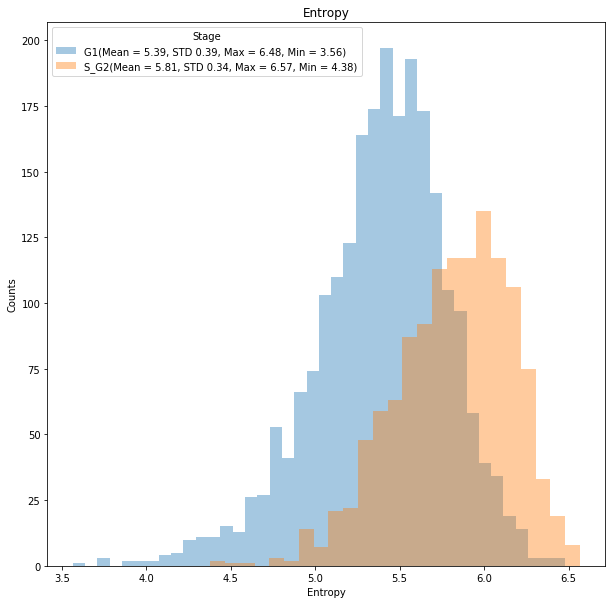

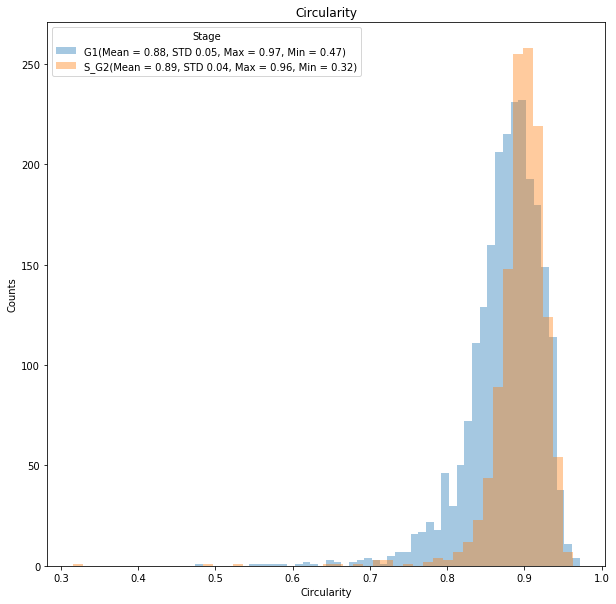

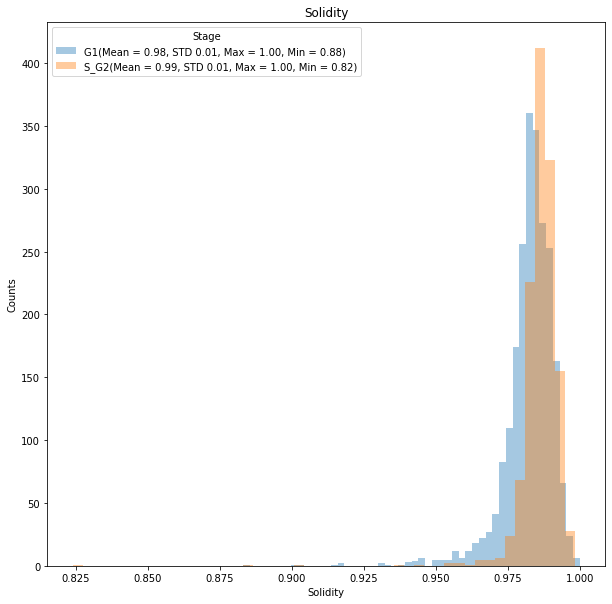

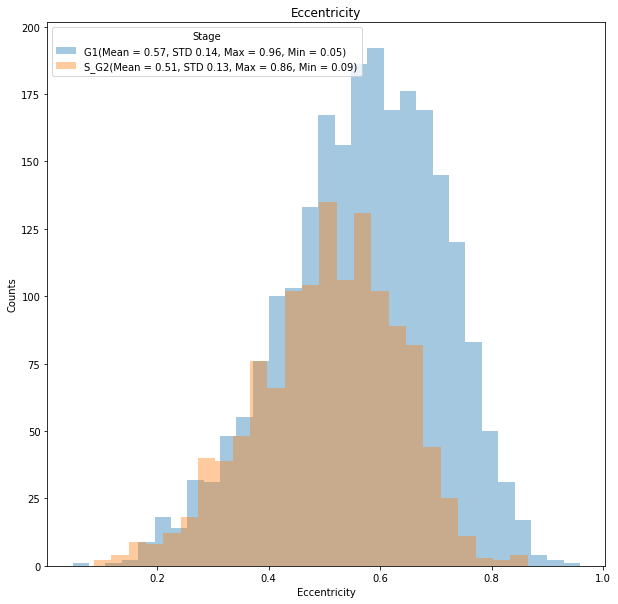

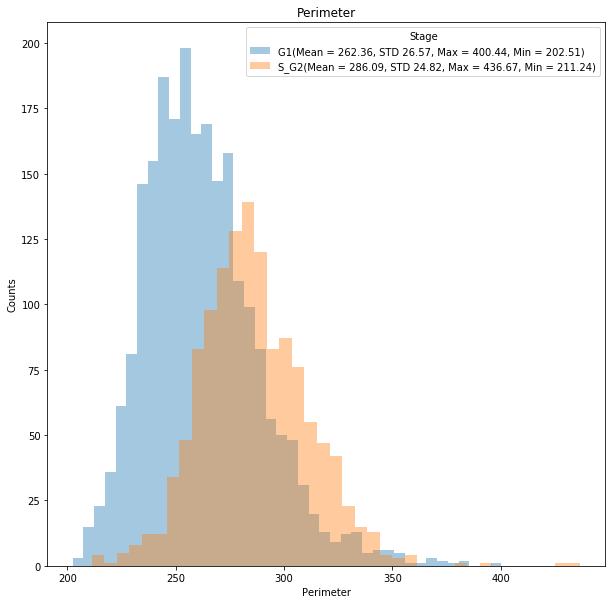

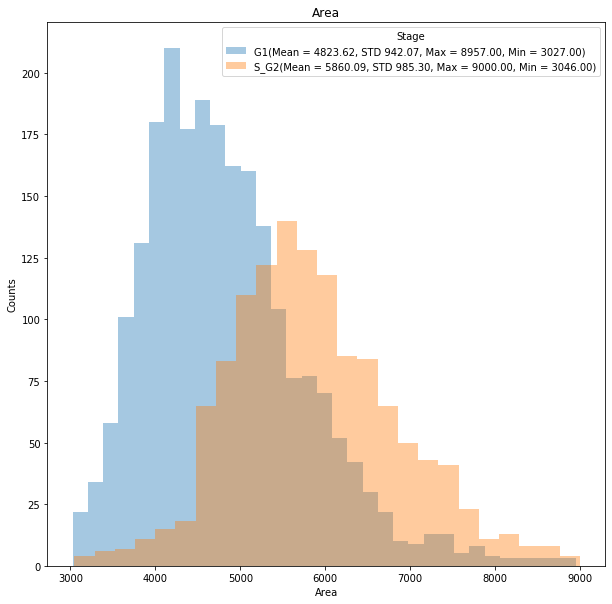

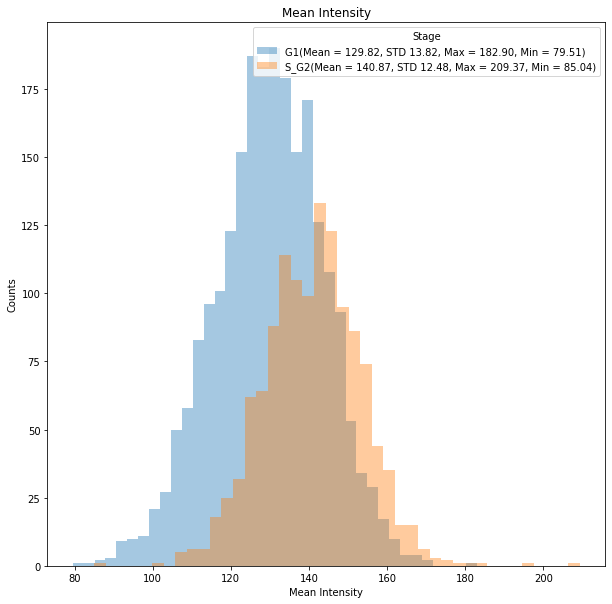

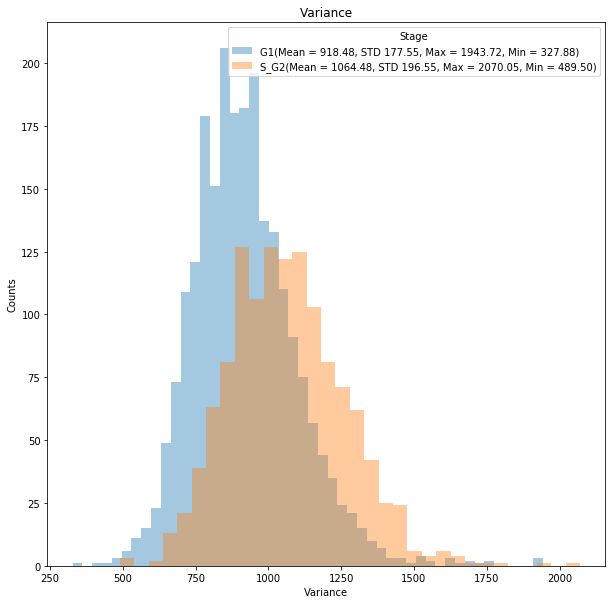

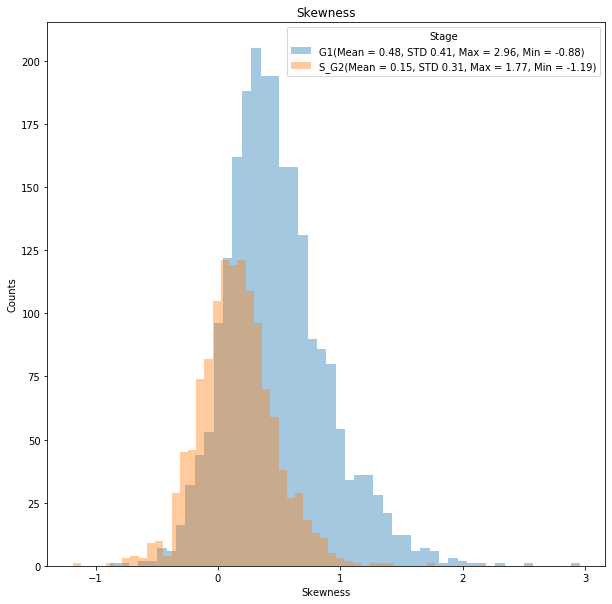

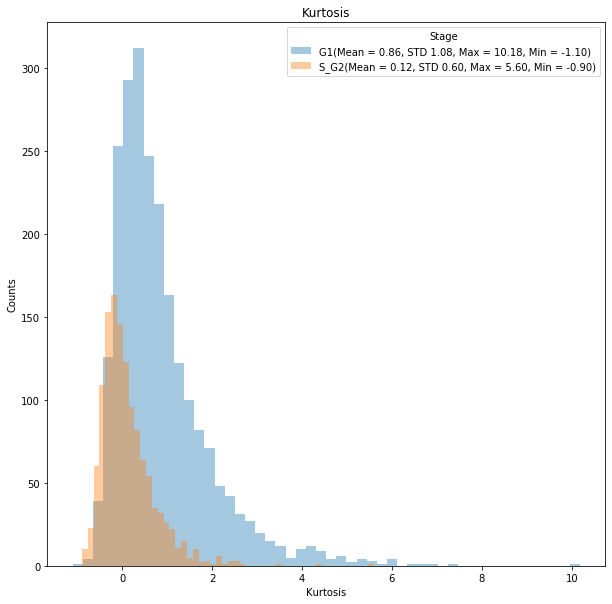

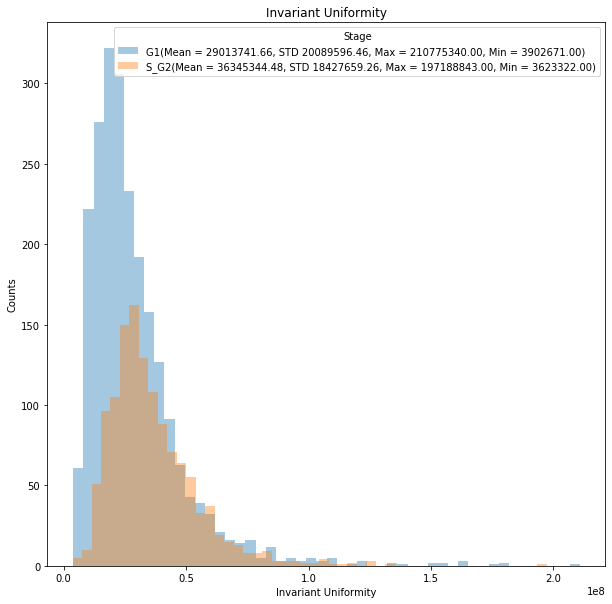

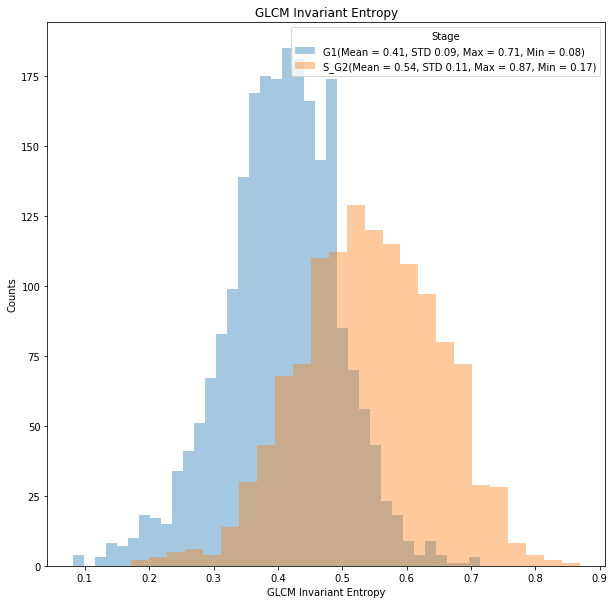

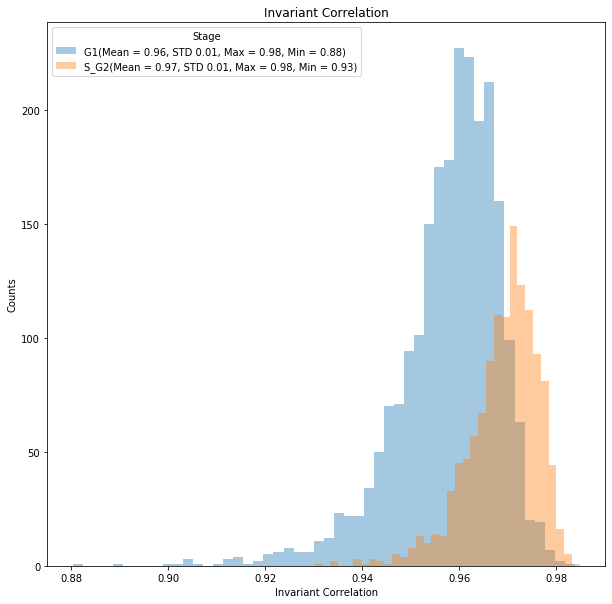

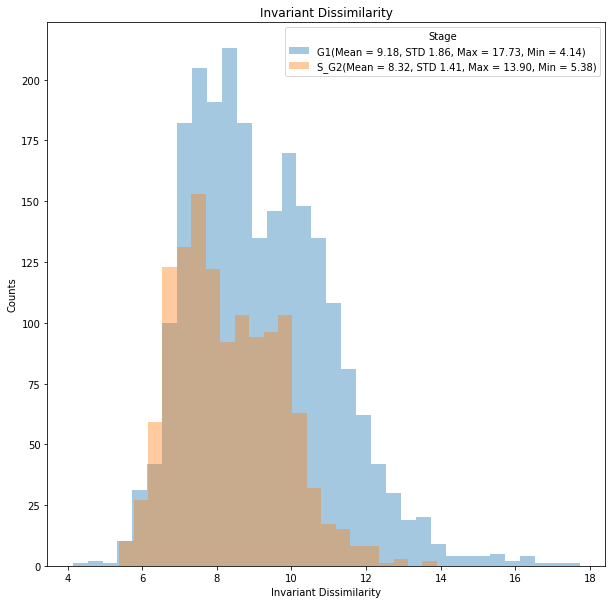

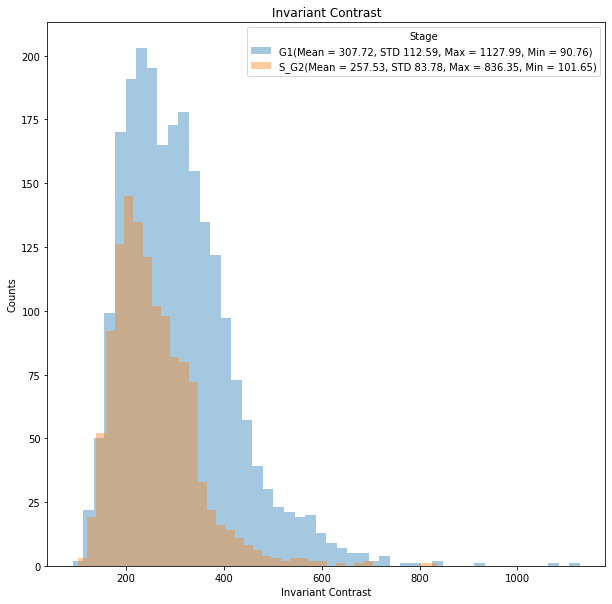

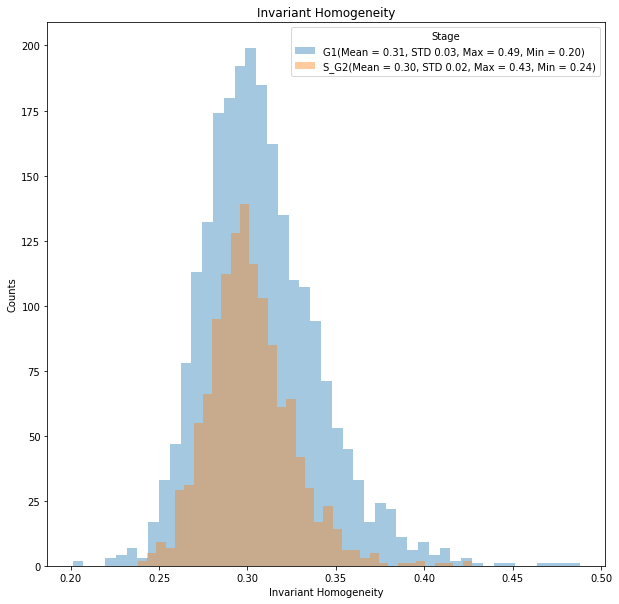

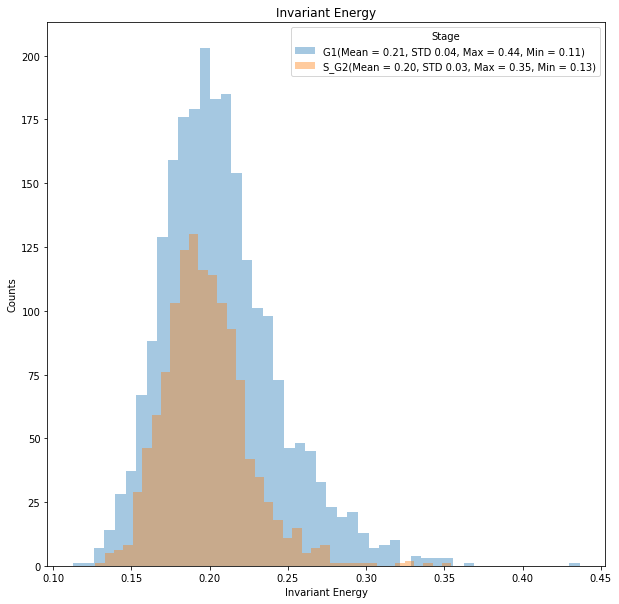

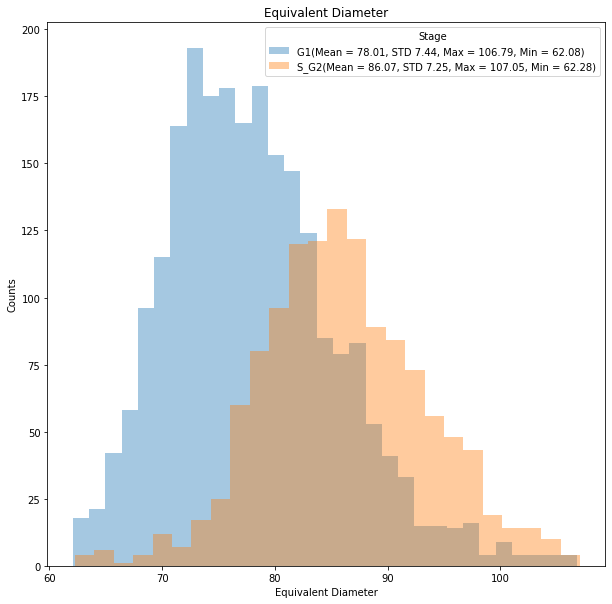

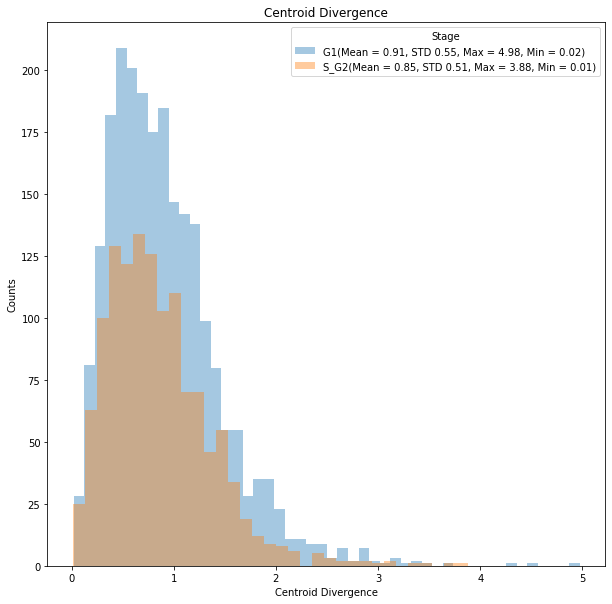

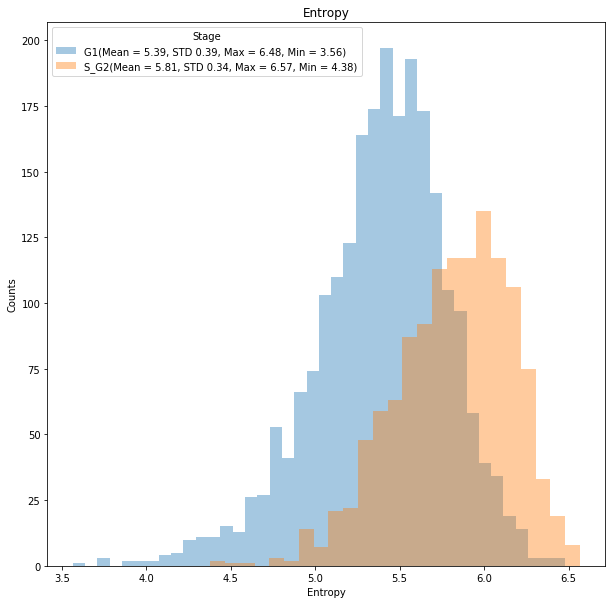

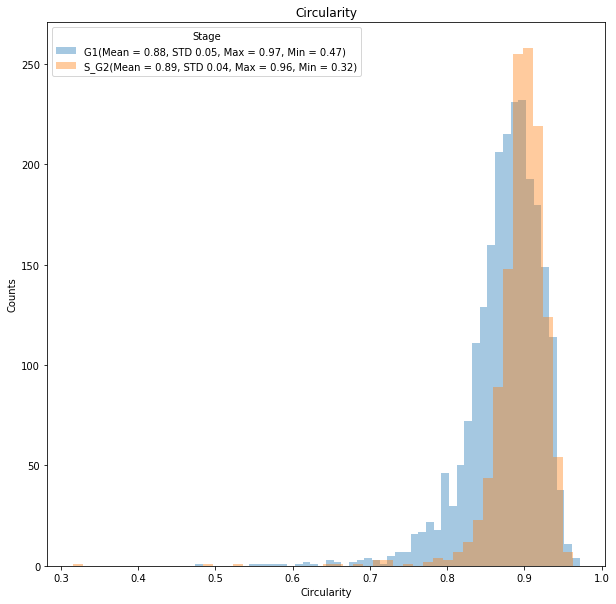

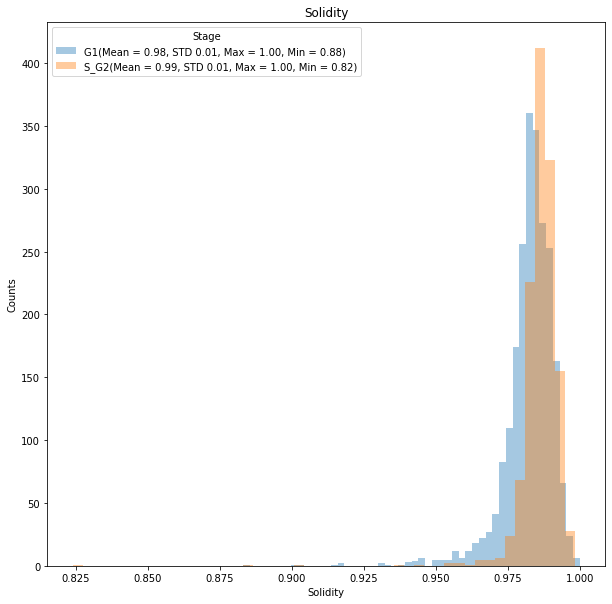

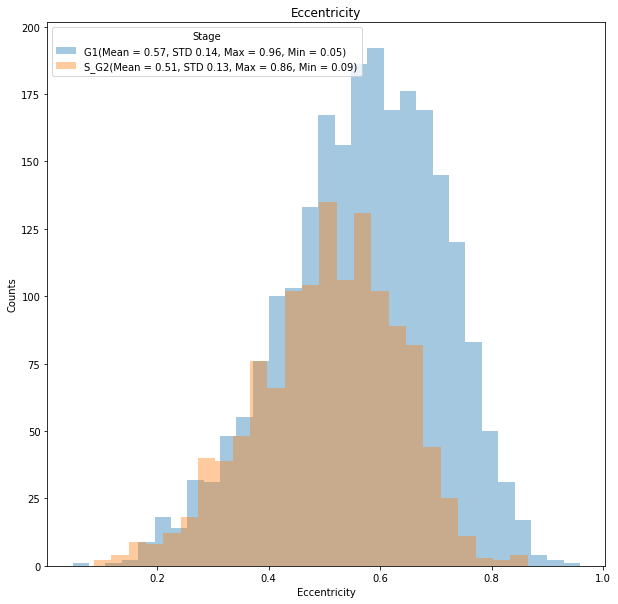

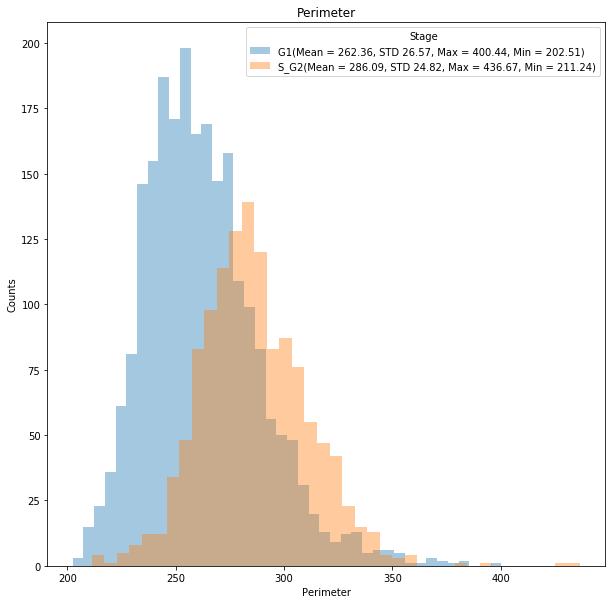

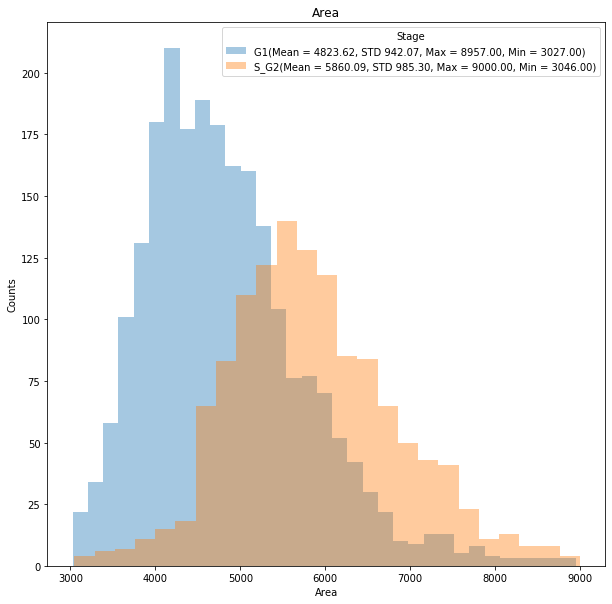

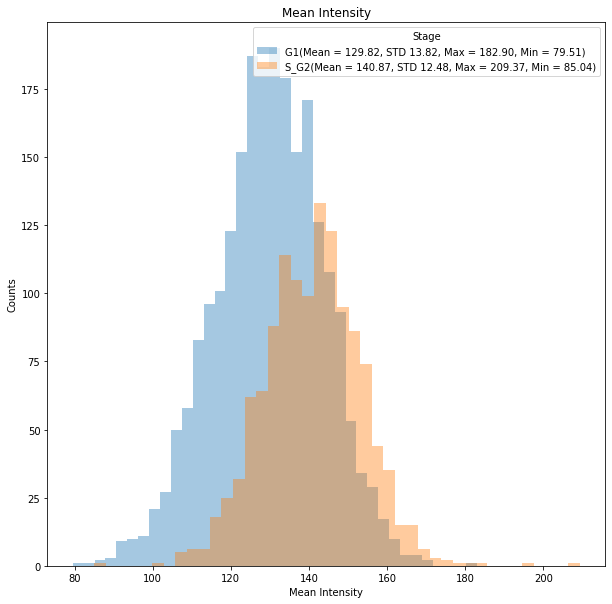

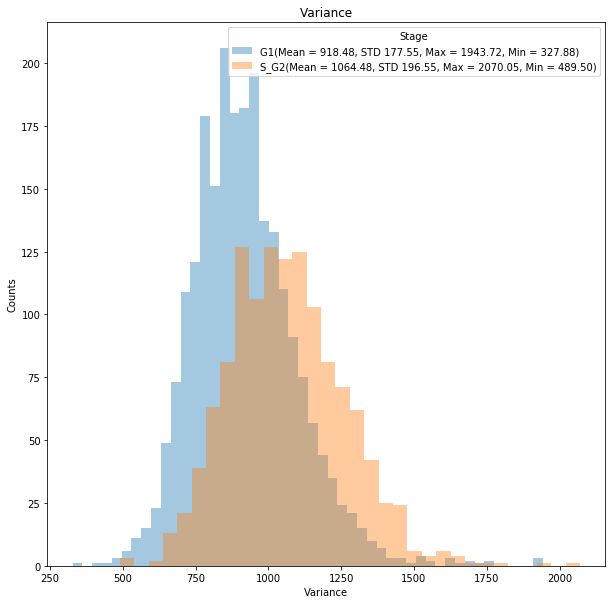

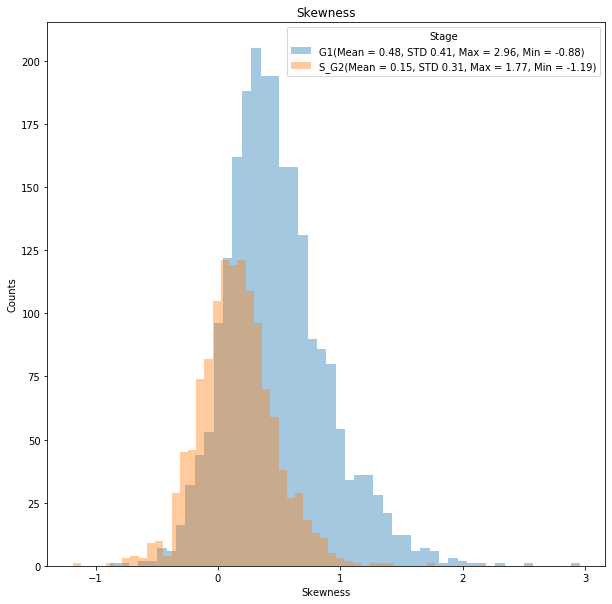

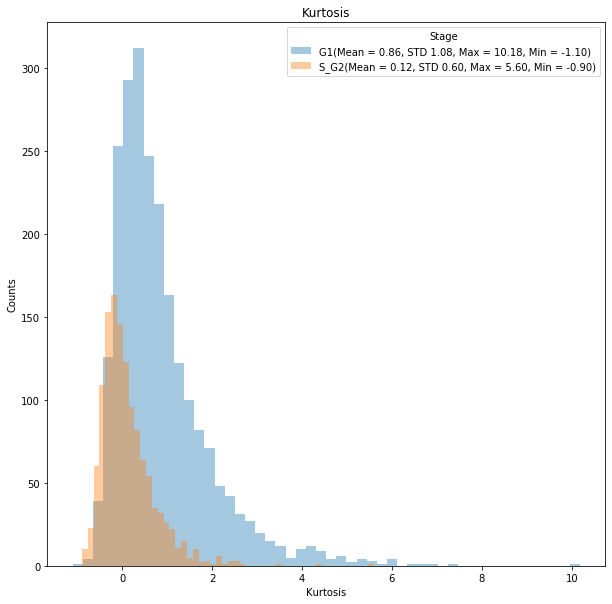

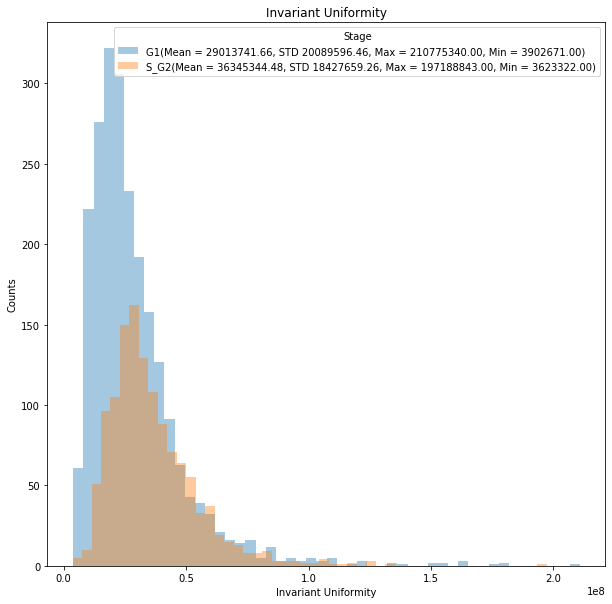

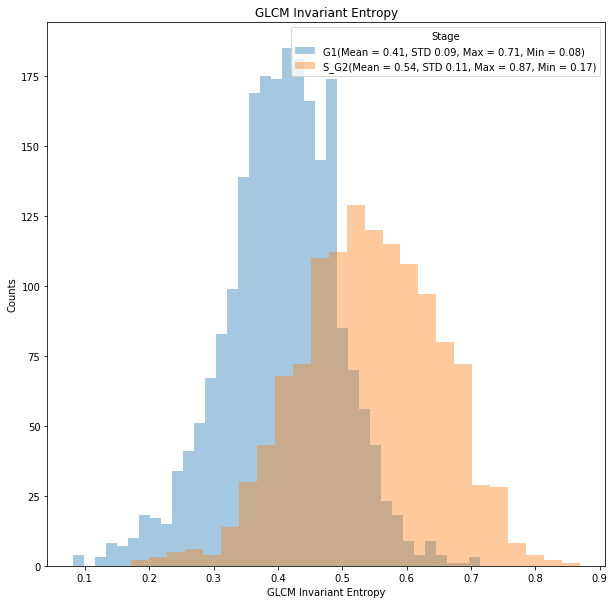

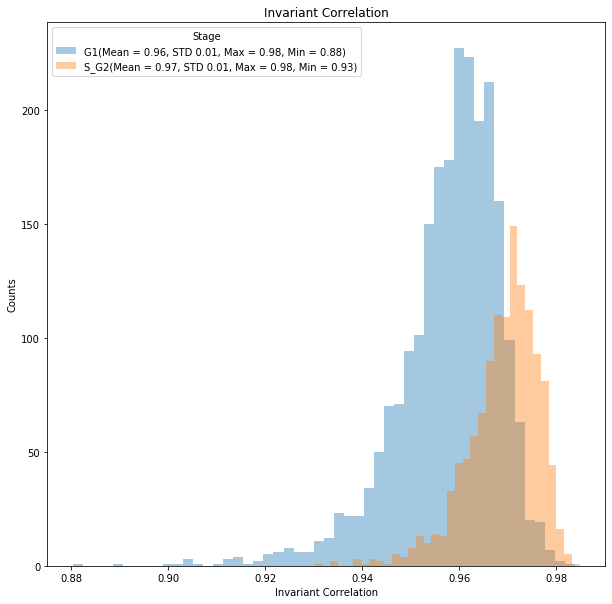

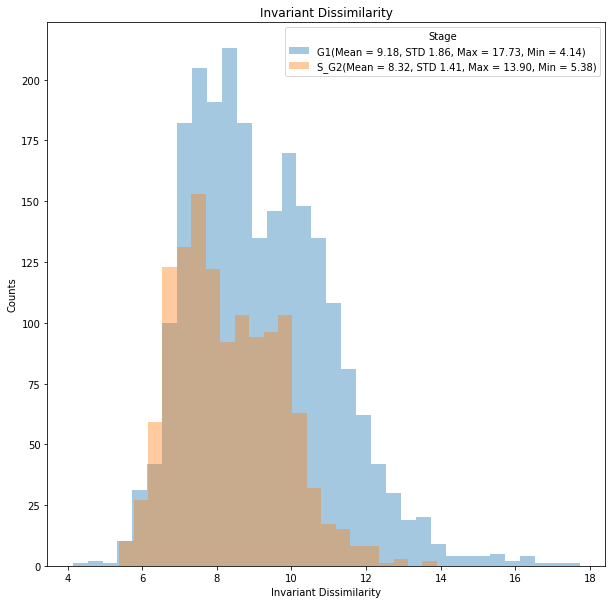

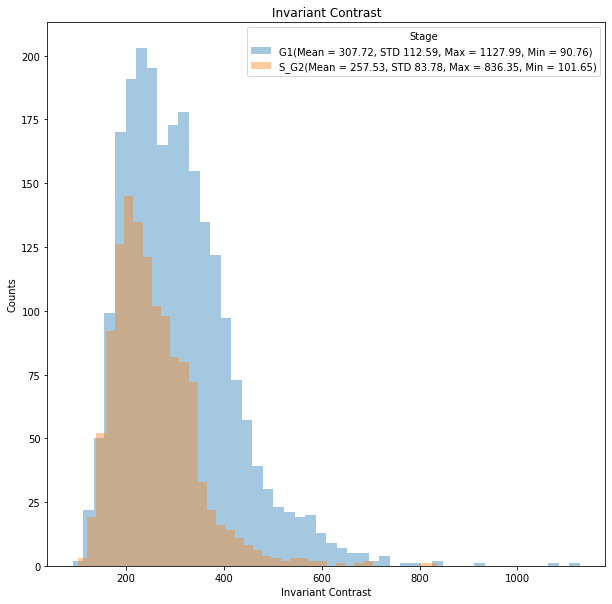

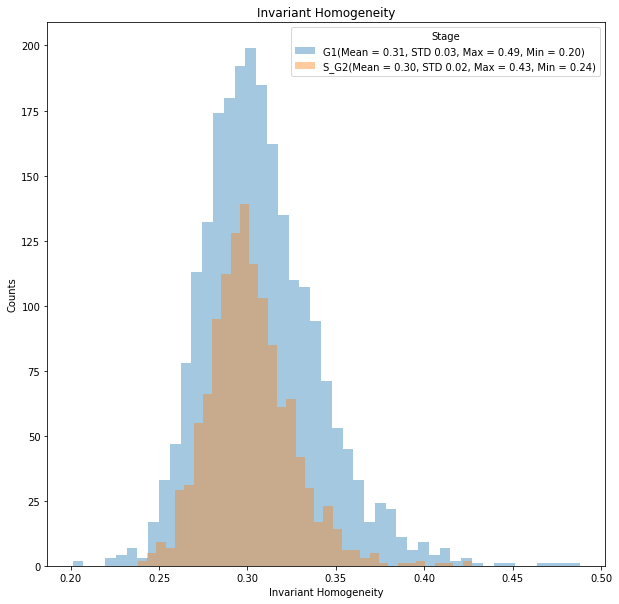

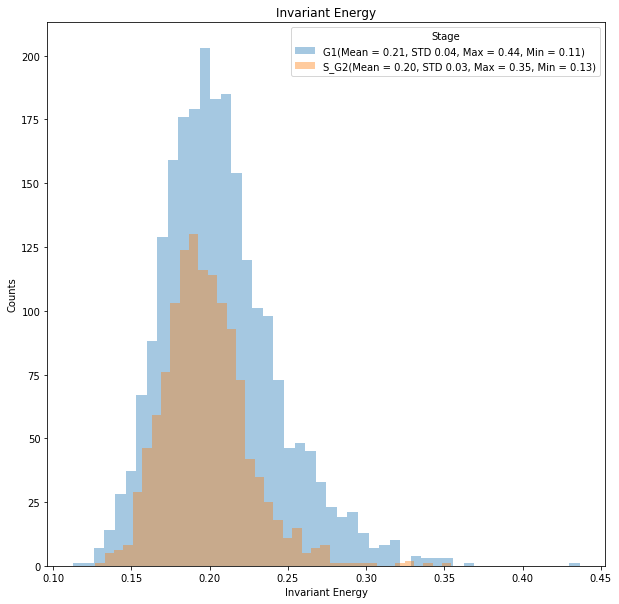

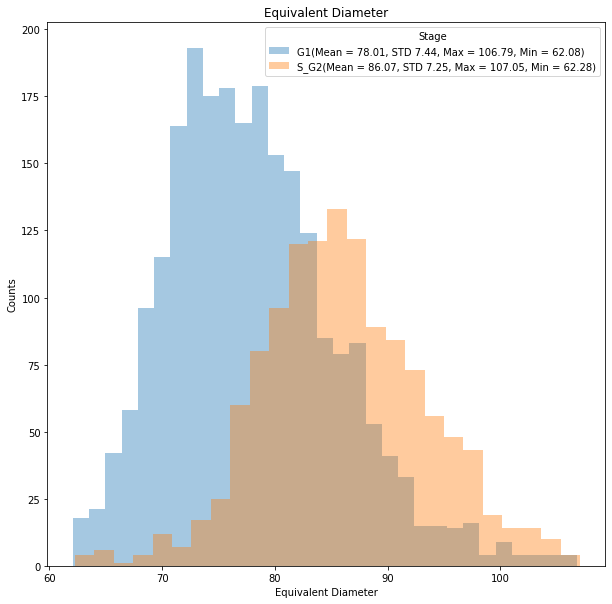

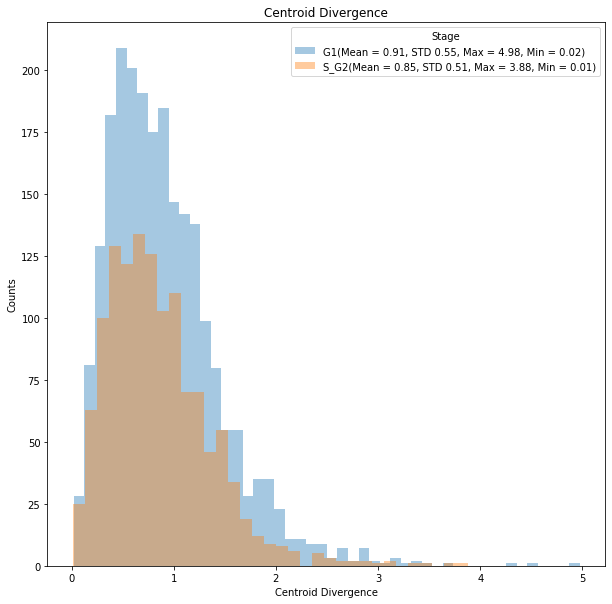

In [55]:
#analysing data for t-test, with and without assumption of equal variance
#also, plots of histogram counts rather than density

types = ['G1','S_G2']
columns = ['Entropy',
            'Circularity',
            'Solidity',
            'Eccentricity',
            'Perimeter',
            'Area',
            'Mean Intensity',
            'Variance',
            'Skewness',
            'Kurtosis',
            'Invariant Uniformity',
            'GLCM Invariant Entropy',
            'Invariant Correlation',
            'Invariant Dissimilarity',
            'Invariant Contrast',
            'Invariant Homogeneity',
            'Invariant Energy',
            'Equivalent Diameter',
            'Centroid Divergence']


plt.rcParams['figure.figsize'] = (10,10)
print ('---------------- EQUAL VAR TRUE ----------------')
plt_hist_and_stats_ttest(columns, types, equal_var = True)
print ('---------------- EQUAL VAR FALSE ----------------')
plt_hist_and_stats_ttest(columns, types, equal_var = False)

In [46]:
#not used, dataset for each phase not the same size

#paired t-test, to check how a change of phase causes differences on nuclei features


def plt_hist_and_stats_ttest_paired(columns, types, histogram = True):
    for column in columns:
        #create a new figure
        plt.figure()
        for subtype in types:
            
            tp = eval(subtype)
            #subset to the type

            #compute some statistics
            aux = tp[column].describe()

            #Draw the density plot
            sns.distplot(tp[column], hist = histogram, kde = False,
                        label = subtype+r'(Mean = %0.2f, STD %0.2f, Max = %0.2f, Min = %0.2f)' % (aux['mean'], aux['std'], aux['max'], aux['min']))
            plt.legend(prop = {'size': 10}, title = 'Stage')
            plt.title(column)
            plt.xlabel(column)
            plt.ylabel('Counts')
            
        subset1  = eval(types[0])
        subset2 = eval(types[1])
        u_statistic, pVal = stats.ttest_rel(subset1[column], subset2[column])
        print('THE P-VALUE IS:')
        print(pVal)
        if pVal < 0.05:
            aux = '\033[1m' + ' is ' + '\033[0m'
            aux = colored(aux, 'blue') 
            hipothesis =  'H1: The difference' + aux + 'statistically significant (at significance level: 0.05).'
        else:
            aux = '\033[1m' + ' is not ' + '\033[0m'
            aux = colored(aux, 'blue')
            hipothesis ='H0: The difference' + aux + 'statistically significant (at significance level: 0.05).'
        print('For feature ' + column + ' - ' + hipothesis)
        #print(u_statistic)

In [ ]:
types = ['G1','S_G2']
columns = ['Entropy',
            'Circularity',
            'Solidity',
            'Eccentricity',
            'Perimeter',
            'Area',
            'Mean Intensity',
            'Variance',
            'Skewness',
            'Kurtosis',
            'Invariant Uniformity',
            'GLCM Invariant Entropy',
            'Invariant Correlation',
            'Invariant Dissimilarity',
            'Invariant Contrast',
            'Invariant Homogeneity',
            'Invariant Energy',
            'Equivalent Diameter',
            'Centroid Divergence']


print ('---------------- PAIRED T TEST ----------------')
plt_hist_and_stats_ttest_paired(columns, types)